In [30]:
from data_utils import load_data, read_file
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%time X, y, files = load_data('train_1', features=True)

loading 1267 files
Wall time: 10 ms


In [3]:
%time X = np.array(list(X))

Wall time: 5min 31s


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1337)

In [5]:
model = LogisticRegression(C=1, n_jobs=-1, class_weight='balanced')
model2 = AdaBoostClassifier(n_estimators=100, random_state=1337)
model3 = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1337)
model4 = SVC(C=1, class_weight='balanced')

In [6]:
%time model.fit(X_train, y_train)
%time model2.fit(X_train, y_train)
%time model3.fit(X_train, y_train)
%time model4.fit(X_train, y_train)

Wall time: 4.4 s
Wall time: 7.01 s
Wall time: 1.62 s
Wall time: 682 ms


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_preds = model.predict(X_test)
y_preds2 = model2.predict(X_test)
y_preds3 = model3.predict(X_test)
y_preds4 = model4.predict(X_test)

In [8]:
score_1 = roc_auc_score(y_test, y_preds)
score_2 = roc_auc_score(y_test, y_preds2)
score_3 = roc_auc_score(y_test, y_preds3)
score_4 = roc_auc_score(y_test, y_preds4)

In [9]:
for i, score in enumerate([score_1, score_2, score_3, score_4]):
    print "AUC model_%s %f: " %(i+1, score)

AUC model_1 0.530520: 
AUC model_2 0.522325: 
AUC model_3 0.512195: 
AUC model_4 0.515421: 


In [10]:
matrix_1 = confusion_matrix(y_test, y_preds)
matrix_2 = confusion_matrix(y_test, y_preds2)
matrix_3 = confusion_matrix(y_test, y_preds3)
matrix_4 = confusion_matrix(y_test, y_preds4)

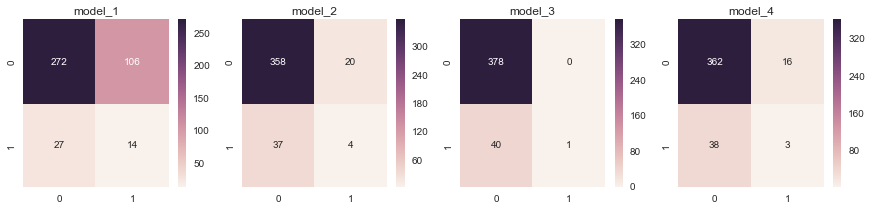

In [11]:
titles = ['model_1', 'model_2', 'model_3', 'model_4']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for i, matrix in enumerate([matrix_1, matrix_2, matrix_3, matrix_4]):
    sns.heatmap(matrix, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(titles[i])
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='regular')

In [13]:
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

In [14]:
%time model.fit(X_resampled, y_resampled)
%time model2.fit(X_resampled, y_resampled)
%time model3.fit(X_resampled, y_resampled)
%time model4.fit(X_resampled, y_resampled)

Wall time: 8.4 s
Wall time: 12.8 s
Wall time: 3.12 s
Wall time: 2.19 s


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_preds_smote = model.predict(X_test)
y_preds2_smote = model2.predict(X_test)
y_preds3_smote = model3.predict(X_test)
y_preds4_smote = model4.predict(X_test)

In [16]:
score_1 = roc_auc_score(y_test, y_preds_smote)
score_2 = roc_auc_score(y_test, y_preds2_smote)
score_3 = roc_auc_score(y_test, y_preds3_smote)
score_4 = roc_auc_score(y_test, y_preds4_smote)

In [17]:
for i, score in enumerate([score_1, score_2, score_3, score_4]):
    print "AUC model_%s %f: " %(i+1, score)

AUC model_1 0.540812: 
AUC model_2 0.545683: 
AUC model_3 0.534230: 
AUC model_4 0.509840: 


In [18]:
matrix_1 = confusion_matrix(y_test, y_preds_smote)
matrix_2 = confusion_matrix(y_test, y_preds2_smote)
matrix_3 = confusion_matrix(y_test, y_preds3_smote)
matrix_4 = confusion_matrix(y_test, y_preds4_smote)

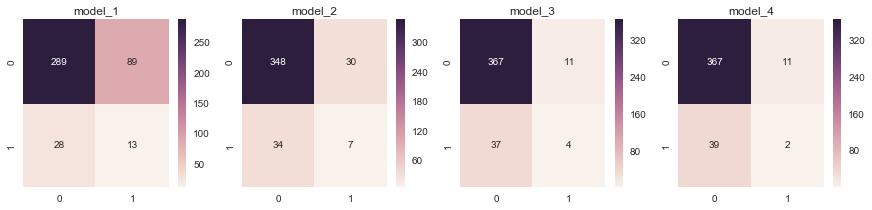

In [19]:
titles = ['model_1', 'model_2', 'model_3', 'model_4']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for i, matrix in enumerate([matrix_1, matrix_2, matrix_3, matrix_4]):
    sns.heatmap(matrix, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(titles[i])
plt.show()